# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [103]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [104]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []
datetime=[]

In [105]:
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "26110f983c93c898337ea864e5ad2400" 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 2 of set 0 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 3 of set 0 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 4 of set 0 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 5 of set 0 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 6 of set 0 | adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 7 of set 0 | port alfred
http://api.openweathermap.org/dat

Processing record 7 of set 1 | koumac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 8 of set 1 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 9 of set 1 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
City not found!
Processing record 10 of set 1 | port macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 11 of set 1 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 12 of set 1 | taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 13 of set 1 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898

Processing record 13 of set 2 | payo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 14 of set 2 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 15 of set 2 | miyako
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 16 of set 2 | impfondo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 17 of set 2 | barawe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
City not found!
Processing record 18 of set 2 | okha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 19 of set 2 | coos bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Proces

Processing record 19 of set 3 | ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 20 of set 3 | ratchaburi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 21 of set 3 | gorontalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 22 of set 3 | jieshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 23 of set 3 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 24 of set 3 | arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 25 of set 3 | brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 

Processing record 26 of set 4 | tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 27 of set 4 | bontang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 28 of set 4 | kyshtovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 29 of set 4 | neuquen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 30 of set 4 | chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 31 of set 4 | camana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 32 of set 4 | nanakuli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing

Processing record 33 of set 5 | luba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 34 of set 5 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 35 of set 5 | port-cartier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 36 of set 5 | elk city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 37 of set 5 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
City not found!
Processing record 38 of set 5 | sicuani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 39 of set 5 | moranbah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea86

Processing record 40 of set 6 | toora-khem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 41 of set 6 | mezen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 42 of set 6 | mareeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 43 of set 6 | laredo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 44 of set 6 | pa sang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 45 of set 6 | yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 46 of set 6 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing recor

Processing record 48 of set 7 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 49 of set 7 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
City not found!
Processing record 50 of set 7 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 0 of set 8 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 1 of set 8 | bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 2 of set 8 | pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 3 of set 8 | edendale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5

Processing record 5 of set 9 | philippeville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 6 of set 9 | oriximina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 7 of set 9 | erzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 8 of set 9 | inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 9 of set 9 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 10 of set 9 | opatija
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 11 of set 9 | subacius
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
City not f

Processing record 13 of set 10 | smithers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 14 of set 10 | araguaina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 15 of set 10 | luau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 16 of set 10 | katima mulilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 17 of set 10 | cape elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
City not found!
Processing record 18 of set 10 | tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 19 of set 10 | zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93

Processing record 19 of set 11 | mangrol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 20 of set 11 | saint-leu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 21 of set 11 | augusto correa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 22 of set 11 | podporozhye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 23 of set 11 | big bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 24 of set 11 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c898337ea864e5ad2400
Processing record 25 of set 11 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26110f983c93c8983

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [106]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Temp          577
Lat           577
Lng           577
Wind Speed    577
dtype: int64

In [107]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,saint-philippe,32,RE,1585199612,78,79.81,-21.36,55.77,20.45
1,sitka,90,US,1585199613,93,39.20,57.05,-135.33,8.05
2,hithadhoo,48,MV,1585199613,72,83.61,-0.60,73.08,13.47
3,carnarvon,0,AU,1585199613,32,95.00,-24.87,113.63,12.75
4,busselton,19,AU,1585199613,46,81.27,-33.65,115.33,4.14


In [108]:
cities_list = zip(new_cities,cloudiness,country,date,humidity,temp,lat,lng)
# Set variable for output file
output_file = os.path.join('output_data', 'cities.csv')
#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

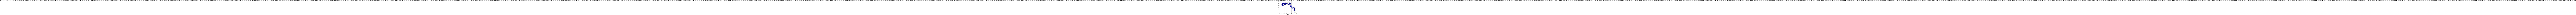

In [112]:
weather_data.plot(kind='scatter', x='Lat', y='Temp', c='DarkBlue')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("Images/LatitudeVsTemperature.png")

#### Latitude vs. Humidity Plot

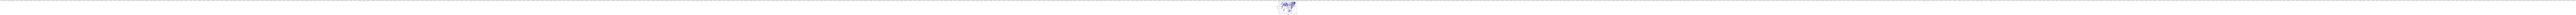

In [111]:
weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("Images/LatitudeVsHumidity.png")

#### Latitude vs. Cloudiness Plot

In [ ]:
weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("Images/LatitudeVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

In [ ]:
weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("Images/LatitudeVsWindSpeed.png")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere=weather_data[weather_data['Lat']>0]
Southern_Hemisphere=weather_data[weather_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#Northern Hemisphere - Temperature (F) vs. Latitude
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude vs Temperature (F) in Northern Hemisphere")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression displays a negative correlation.")
plt.savefig("Images/Northern Hemisphere - Latitude vs Temperature (F).jpeg")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude vs Temperature (F) in Southern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
plt.savefig("Southern Hemisphere - Latitude vs Temperature (F).jpeg")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#Northern Hemisphere - Humidity (%) vs. Latitude
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs Humidity (%) in Northern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
plt.savefig("Northern Hemisphere - Latitude vs Humidity (%).jpeg")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#Southern Hemisphere - Humidity (%) vs. Latitude
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs Humidity (%) in Southern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
plt.savefig("Southern Hemisphere - Latitude vs Humidity (%).jpeg")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs Cloudiness (%) in Northern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
plt.savefig("Northern Hemisphere - Latitude vs Cloudiness (%).jpeg")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs Cloudiness (%) in Southern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
plt.savefig("Southern Hemisphere - Latitude vs Cloudiness (%).jpeg")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs Wind Speed (mph) in Northern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
plt.savefig("Northern Hemisphere - Latitude vs Wind Speed (mph).jpeg")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs Wind Speed (mph) in Southern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
plt.savefig("Southern Hemisphere - Latitude vs Wind Speed (mph).jpeg")
plt.show()

In [ ]:
Analysis:
1. Weather becomes warmer as we approach the equator. From the plot, the northern hemisphere seems to be slightly warmer. 
2. There is not much relationship between latitude and cloudiness.
3. There is not much relationship between latitude and humidity.
4. There is not much relationship between latitude and wind speed.